FFTの速さを見よ
===

というわけで，Discrete Fourier Transform（離散フーリエ変換）の高速な計算方法であるFast Fourier Transformがどれだけ速いのかを見てみる．
ベンチマークのソースコードはsrc/main.rsを見よ．`dft`は行列演算を使ってナイーブにDFTを求めており，`fft`はFFTの（入力長を$2^n$に限った）
実装である．

まずはライブラリのロード．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ベンチ結果をCSVファイルから読み込む．数値はいずれもナノ秒単位である．

In [2]:
n = []
dft = []
fft = []
fftfast = []
with open('bench.csv') as f:
    for line in f:
        k, d, f, ff = line.strip().split(',')
        n.append(k)
        dft.append(d)
        fft.append(f)
        fftfast.append(ff)

print(n)
print(dft)
print(fft)
print(fftfast)
 
n = np.array(n[1:], dtype=int)
dft = np.array(dft[1:], dtype=int)
fft = np.array(fft[1:], dtype=int)
fftfast = np.array(fftfast[1:], dtype=int)

['n', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
['dft', '158', '673', '2889', '10435', '41262', '168052', '668279', '2683292', '10676546', '40774923', '166462642']
['fft', '184', '615', '1656', '4035', '9500', '21890', '49328', '109205', '240169', '520105', '1148503']
['fftfast', '122', '426', '1197', '3075', '7366', '17345', '39485', '89624', '197767', '429409', '935575']


# 行列演算によるナイーブなDFT

入力長のビット数が増えるたび指数的に実行時間が増えている．
なお，今回は横軸の変数を入力ベクトルの長さのビット数にとった．
すなわち，横軸が10のときは$2^10 = 1024$要素のベクトルのDFTを計算していることになる．

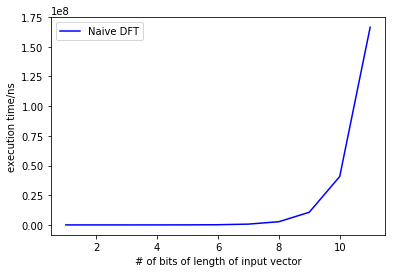

In [3]:
plt.plot(n, dft, 'b', label = 'Naive DFT')
plt.xlabel('# of bits of length of input vector')
plt.ylabel('execution time/ns')
plt.legend(loc = 'best')

# FFT

こちらも指数的に増えているのだが，縦軸を見るとナイーブな実装よりも格段に高速である．
（上のグラフでは`1e8`，すなわち$10^8$まで実行時間が伸びていることに注意せよ）

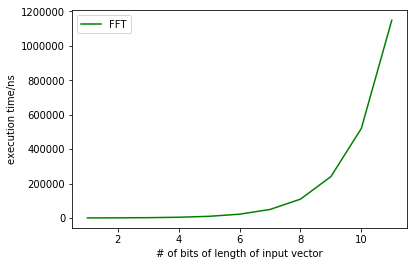

In [4]:
plt.plot(n, fft, 'g', label = 'FFT')
plt.xlabel('# of bits of length of input vector')
plt.ylabel('execution time/ns')
plt.legend(loc = 'best')

# ナイーブな実装とFFTの比較

これらの2つを同時にプロットすると差は歴然である．

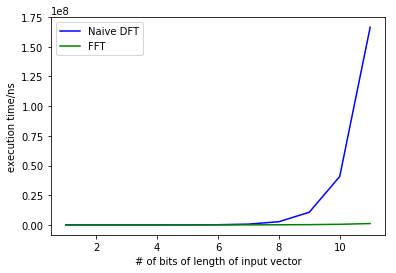

In [5]:
plt.plot(n, dft, 'b', label = 'Naive DFT')
plt.plot(n, fft, 'g', label = 'FFT')
plt.xlabel('# of bits of length of input vector')
plt.ylabel('execution time/ns')
plt.legend(loc = 'best')

# ナイーブな実装とFFTの比較(2)

2つの実行時間の比を取ると，これも指数的に成長していることが分かる（対数軸に注意）．

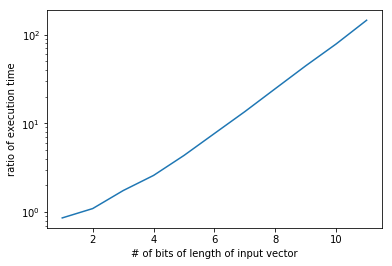

In [6]:
plt.plot(n, dft / fft)
plt.xlabel('# of bits of length of input vector')
plt.ylabel('ratio of execution time')
plt.yscale('log')

# オーダー

実際，簡単な計算により，
ナイーブな実装の計算量は 
$$
O(2^{2n})
$$
FFTの計算量は
$$
O(n2^n)
$$
であることが分かる．
定数部分はどうやらFFTの方が大きいようだ．

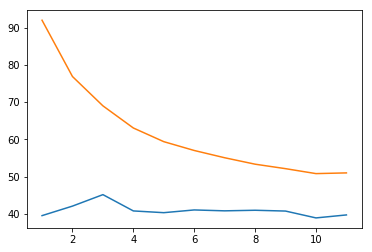

In [7]:
plt.plot(n, dft / np.power(2, 2 * n))
plt.plot(n, fft / (n * np.power(2, n)))

# 終わりに

FFTは速い．
ちなみに，量子コンピュータを使うとFFTを$O(n^2)$で実装できることが知られている．
残念ながら，確率振幅に埋め込まれたDFTを取り出すのに指数時間が必要なので，DFT自体の計算に量子コンピュータを使っても高速化は望めない．
しかし，他のアルゴリズムの一部として高速な量子FFTを用いることによって，例えば素因数分解の高速な計算（Shor's Algorithm）が可能になる．

# 追伸: 定数倍高速化

FFTの実装をいじって定数倍高速化してみた．
キャッシュに乗るかどうかでも結果は違うので，ブロック化とかも効きそう．
SIMD命令を使うのも速そう．

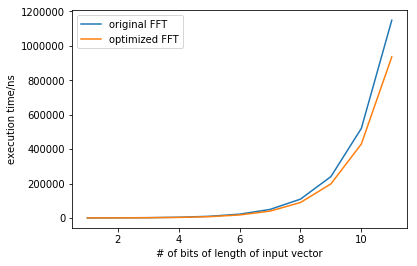

In [8]:
plt.plot(n, fft, label = 'original FFT')
plt.plot(n, fftfast, label = 'optimized FFT')
plt.xlabel('# of bits of length of input vector')
plt.ylabel('execution time/ns')
plt.legend(loc = 'best')

だんだん性能の改善が下がっているがまあ定数倍高速化と言って良いんじゃないですか（適当）

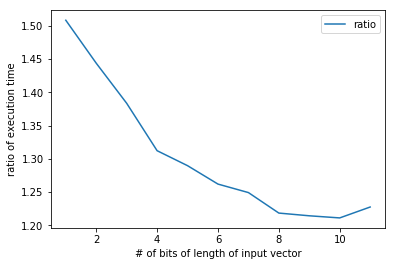

In [9]:
plt.plot(n, fft / fftfast, label = 'ratio')
plt.xlabel('# of bits of length of input vector')
plt.ylabel('ratio of execution time')
plt.legend(loc = 'best')